In [1]:
# -*- coding: utf-8 -*-
import sys
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import axes3d
#from matplotlib import cm
from matplotlib import collections
import time

In [2]:
# Lattice depth V_lat = s E_R^{\lambda}
s1 = 1
s2 = 1
s3 = 1


# Calculation
m = 6
Nsite = 2 * m + 1

b1 = np.array([1, 0])
b2 = np.array([-1, -np.sqrt(3)])/2

In [3]:
dn = 15

n_list = [(x, 0) for x in np.linspace(0, 1/2, int(dn * np.sqrt(3)))] # Gamma -> M
n_M = len(n_list) - 0.5

n_list = n_list + [(1/2 - x/6, -x/3) for x in np.linspace(0, 1, dn) if x>0] # M -> K
n_K = len(n_list) - 0.5

n_list = n_list + [(x/3, -x/3) for x in np.linspace(1, 0, dn*2) if x<1] # K -> Gamma
n_Gamma = len(n_list)

l_list = [(x, y) for x in np.linspace(-m, m, Nsite, dtype=np.int) for y in np.linspace(-m, m, Nsite, dtype=np.int)]
E = np.zeros([len(n_list), Nsite**2])
C = np.zeros([Nsite**2, len(n_list), Nsite**2], dtype=np.complex)

H_tmp = np.zeros([Nsite**2, Nsite**2])

l1 = np.zeros([Nsite**2, Nsite**2])
m1 = np.zeros([Nsite**2, Nsite**2])
l2 = np.zeros([Nsite**2, Nsite**2])
m2 = np.zeros([Nsite**2, Nsite**2])

start = time.time()

for i_1, ls_1 in enumerate(l_list):
    for i_2, ls_2 in enumerate(l_list):
        l1[i_1][i_2] = ls_1[0]
        m1[i_1][i_2] = ls_1[1]
        l2[i_1][i_2] = ls_2[0]
        m2[i_1][i_2] = ls_2[1]
        
        l_diff = np.array(ls_1) - np.array(ls_2)
        
        condition_1 = (int(np.abs(ls_1[0] - ls_2[0])) == 1) and (ls_1[1] == ls_2[1])
        condition_2 = (ls_1[0] == ls_2[0]) and (int(np.abs(ls_1[1] - ls_2[1])) == 1)
        condition_3 = ((l_diff[0] == 1) and (l_diff[1] == 1)) or ((l_diff[0] == -1) and (l_diff[1] == -1))
        if condition_1:
            H_tmp[i_1][i_2] = - s1 / 4
        elif condition_2:
            H_tmp[i_1][i_2] = - s2/ 4
        elif condition_3:
            H_tmp[i_1][i_2] = - s3 / 4

        
for i_n, n in enumerate(n_list):
    H = np.zeros([Nsite**2, Nsite**2])
    H += H_tmp
    
    K = 3 * ((n[0] + l1)**2 + (n[1] + m1)**2 - (n[0] + l2) * (n[1] + m2)) + (s1+s2+s3)
#    H += ((np.abs(l1 - l2) < 1) * (np.abs(m1 - m2) < 1)) * K
    H += ((l1 == l2) * (m1 == m2)) * K
    
#    for i_1, ls_1 in enumerate(l_list):
#        for i_2, ls_2 in enumerate(l_list):
#            l_diff = np.array(ls_1) - np.array(ls_2)
#            
#            if (ls_1[0] == ls_2[0]) and (ls_1[1] == ls_2[1]):
#                H[i_1][i_2] = 3 * ((n[0] + ls_1[0])**2 + (n[1] + ls_1[1])**2 - (n[0] + ls_1[0]) * (n[1] + ls_1[1])) - 3 * s / 4
    
    E0, P = np.linalg.eig(H)
    rearrangedEvalsVecs = sorted(zip(E0, P.T), key=lambda x: x[0].real, reverse=False)
    
    E[i_n, :], tmp = map(list, zip(*rearrangedEvalsVecs))
    C[:, i_n, :] = np.array(tmp)

#    for i in range(Nsite**2):
#        E[i_n, i] = rearrangedEvalsVecs[i][0]
#        P[:, i] = rearrangedEvalsVecs[i][1]

elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

elapsed_time:1.3595943450927734[sec]


(0.0, 68.0)

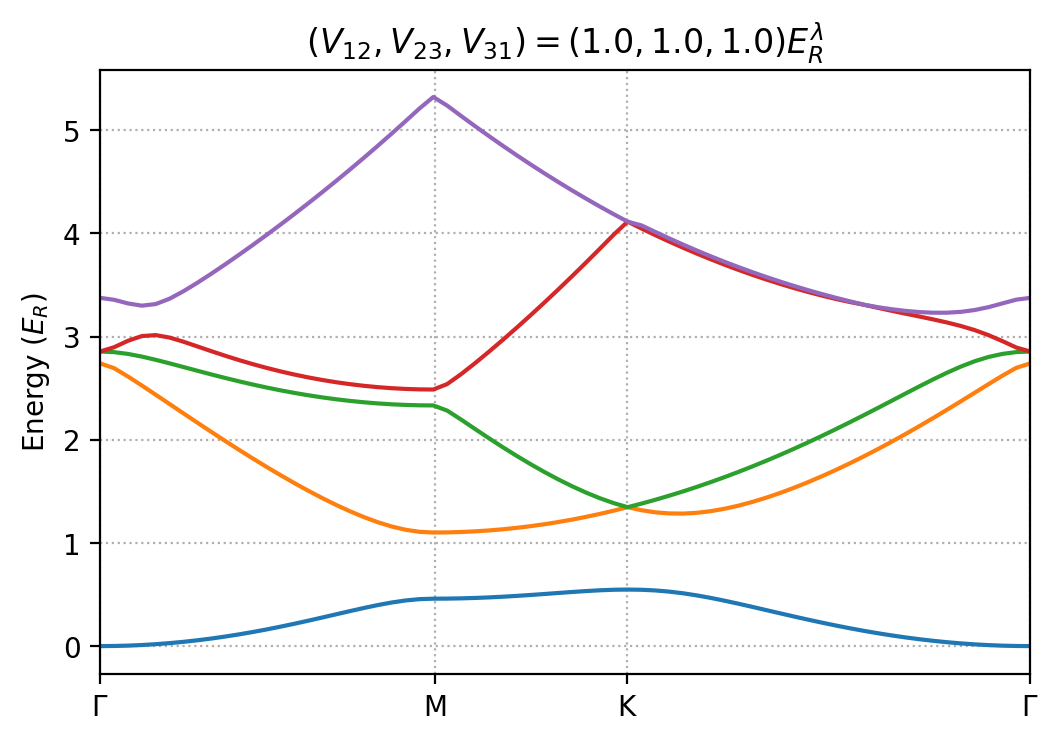

In [7]:
q = np.linspace(0, len(n_list), len(n_list))
title_name = r'$(V_{12},V_{23},V_{31}) =( %.1f, %.1f, %.1f) E_R^{\lambda}$' % (s1,s2,s3)
plt.figure(dpi=200)
plt.plot(q, E[:, 0:5] - E[0, 0])
plt.grid(ls=':')
plt.ylabel('Energy ($E_R$)')
plt.title(title_name)
plt.xticks([0, n_M, n_K, n_Gamma], ['$\Gamma$', 'M', 'K', '$\Gamma$']) # xlocs：位置の配列　xlabels：ラベルの配列
plt.xlim([0, np.max(q)])
#plt.ylim([0, 5])

In [9]:
a_s = 5.3*10**(-9) #s-wave scattering length of 87Rb atom [m]
lambda_L = 1064*10**(-9) #wave lenght of triangular lattice beam [m] 
h_bar = 1.054571596*10**(-34) #Converted Plank const
mrb = 87*1.66053873*10**(-27) #Single atom mass of 174Yb
er = h_bar**2/(2*mrb)*(2*np.pi/lambda_L)**2 #Recoil energy of 1064nm lattice

(0.0, 68.0)

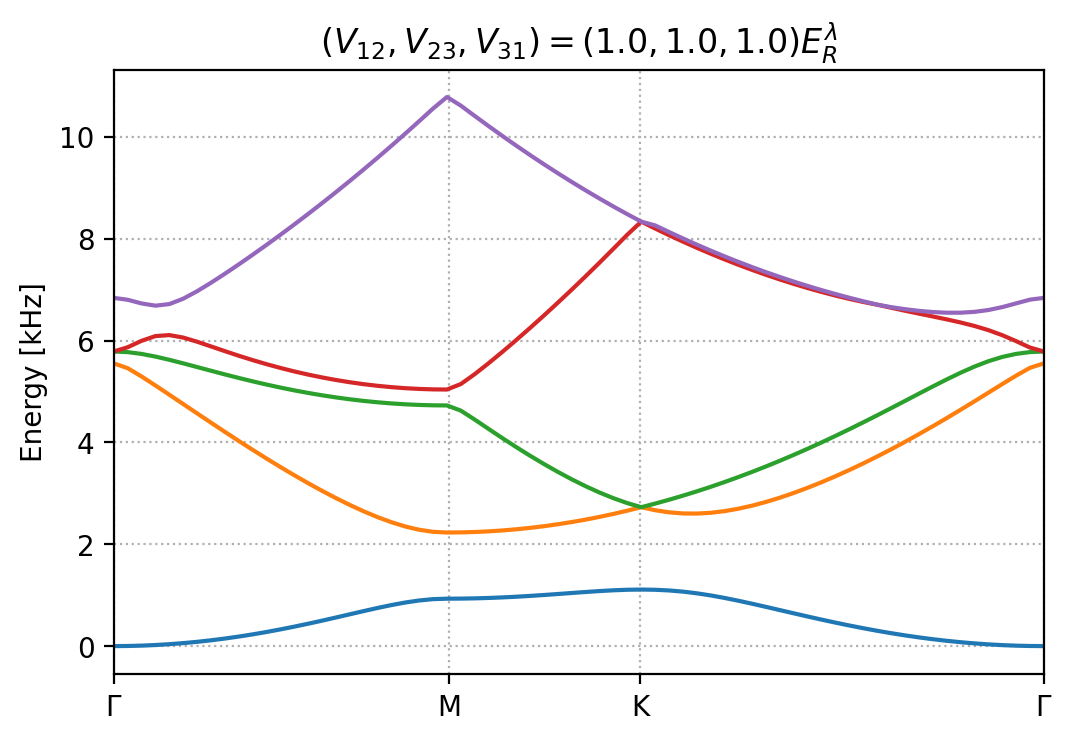

In [11]:
plt.figure(dpi=200)
plt.plot(q, (E[:, 0:5] - E[0, 0])*er/(2*np.pi*h_bar)*1E-03)
plt.grid(ls=':')
plt.ylabel('Energy [kHz]')
plt.title(title_name)
plt.xticks([0, n_M, n_K, n_Gamma], ['$\Gamma$', 'M', 'K', '$\Gamma$']) # xlocs：位置の配列　xlabels：ラベルの配列
plt.xlim([0, np.max(q)])